## Digital soil mapping of clay content

In this tutorial, my goal is to present an easy way to estimate clay content using digital soil mapping approaches. For this, a dataset with n samples with the clay content determined in the laboratory will be used as the target variable to be predicted over an area of n ha. As features, a median reflectance satellite image (Landsat) representing the bare surfaces will be used and a set of spectral indices calculated from Sentinel-2 mean reflectance images from the dry and moist seasons.

In [71]:
### Load libraries
import geopandas as gp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
from osgeo import gdal

In [15]:
### Load dataset
dat_clay = pd.read_csv('DSM_clay/dataset.csv', sep=';')
dat_clay.head()

,X,Y,Clay.gkg,OM.gkg
0,-47.431591,-22.773409,301,22.21
1,-47.449435,-22.841908,503,25.02
2,-47.378210,-22.856072,120,15.00
3,-47.375972,-22.864430,128,8.00
4,-47.372973,-22.868192,117,11.00


In [17]:
### Basic statistics of the target variable
dat_clay.describe().T.style

,count,mean,std,min,25%,50%,75%,max
X,388.000000,-47.405859,0.028572,-47.457000,-47.429812,-47.402296,-47.384326,-47.345924
Y,388.000000,-22.865197,0.029960,-22.907360,-22.889000,-22.874463,-22.842459,-22.773409
Clay.gkg,388.000000,267.840206,161.258360,13.000000,124.000000,234.500000,418.500000,638.000000
OM.gkg,388.000000,18.600335,6.365130,5.800000,13.200000,17.900000,23.025000,39.000000


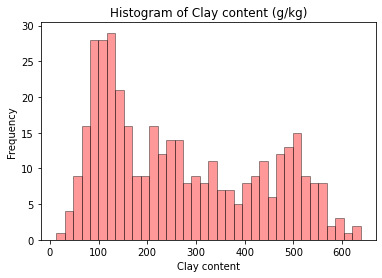

In [70]:
### Plotting histograms and density plots
sns.distplot(dat_clay['Clay.gkg'], hist = True, kde = False, bins = int(180/5), color = 'red', hist_kws = {'edgecolor': 'black'})
plt.title('Histogram of Clay content (g/kg)')
plt.xlabel('Clay content')
plt.ylabel('Frequency')
plt.show()

C:\Users\FREY\anaconda3\envs\gp_environ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


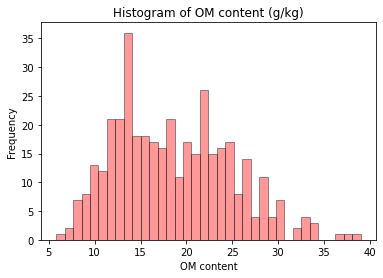

In [69]:
### Plotting histograms and density plot
sns.distplot(dat_clay['OM.gkg'], hist = True, kde = False, bins = int(180/5), color = 'red', hist_kws = {'edgecolor': 'black'})
plt.title('Histogram of OM content (g/kg)')
plt.xlabel('OM content')
plt.ylabel('Frequency')
plt.show()

In [50]:
## Convert pandas dataframe into geopandas
geo = [Point(xy) for xy in zip(dat_clay['X'], dat_clay['Y'])]
CRS = {'init': 'epsg:4326'}
dat_clay_gpd = gp.GeoDataFrame(dat_clay, crs=CRS, geometry=geo)
dat_clay_gpd.head()

C:\Users\FREY\anaconda3\envs\gp_environ\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,X,Y,Clay.gkg,OM.gkg,geometry
0,-47.431591,-22.773409,301,22.21,POINT (-47.43159 -22.77341)
1,-47.449435,-22.841908,503,25.02,POINT (-47.44944 -22.84191)
2,-47.378210,-22.856072,120,15.00,POINT (-47.37821 -22.85607)
3,-47.375972,-22.864430,128,8.00,POINT (-47.37597 -22.86443)
4,-47.372973,-22.868192,117,11.00,POINT (-47.37297 -22.86819)


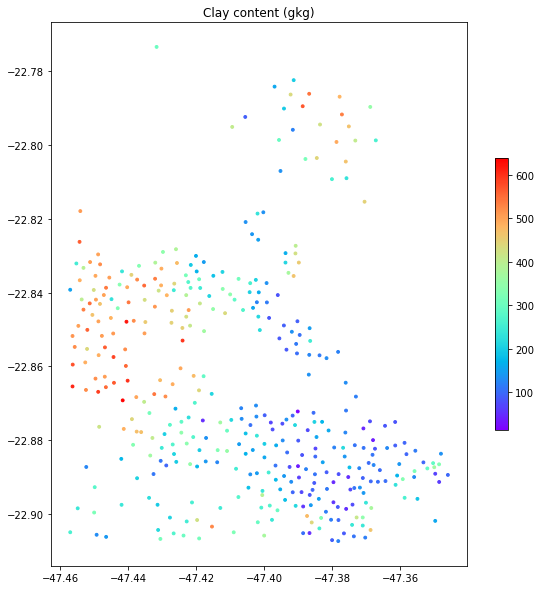

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
dat_clay_gpd.plot(column= 'Clay.gkg', ax = ax, marker='o', markersize = 8, cmap = 'rainbow', legend=True, legend_kwds = {'shrink': 0.5})
ax.set_title('Clay content (gkg)')
plt.show()

In [73]:
## Load rasters
SYSI = gdal.Open('DSM_clay/SYSI_rec.tif')
SYSI

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002338E067240> >